## 1D Data visualization

In [3]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\renat\Desktop\python-statistics\env

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.0-py_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd


In [5]:
d1 = np.loadtxt('../data/example_1.txt')
d2 = np.loadtxt('../data/example_2.txt')
print(d1.shape, d2.shape)

(500,) (500,)


**********
## Histogram Plots

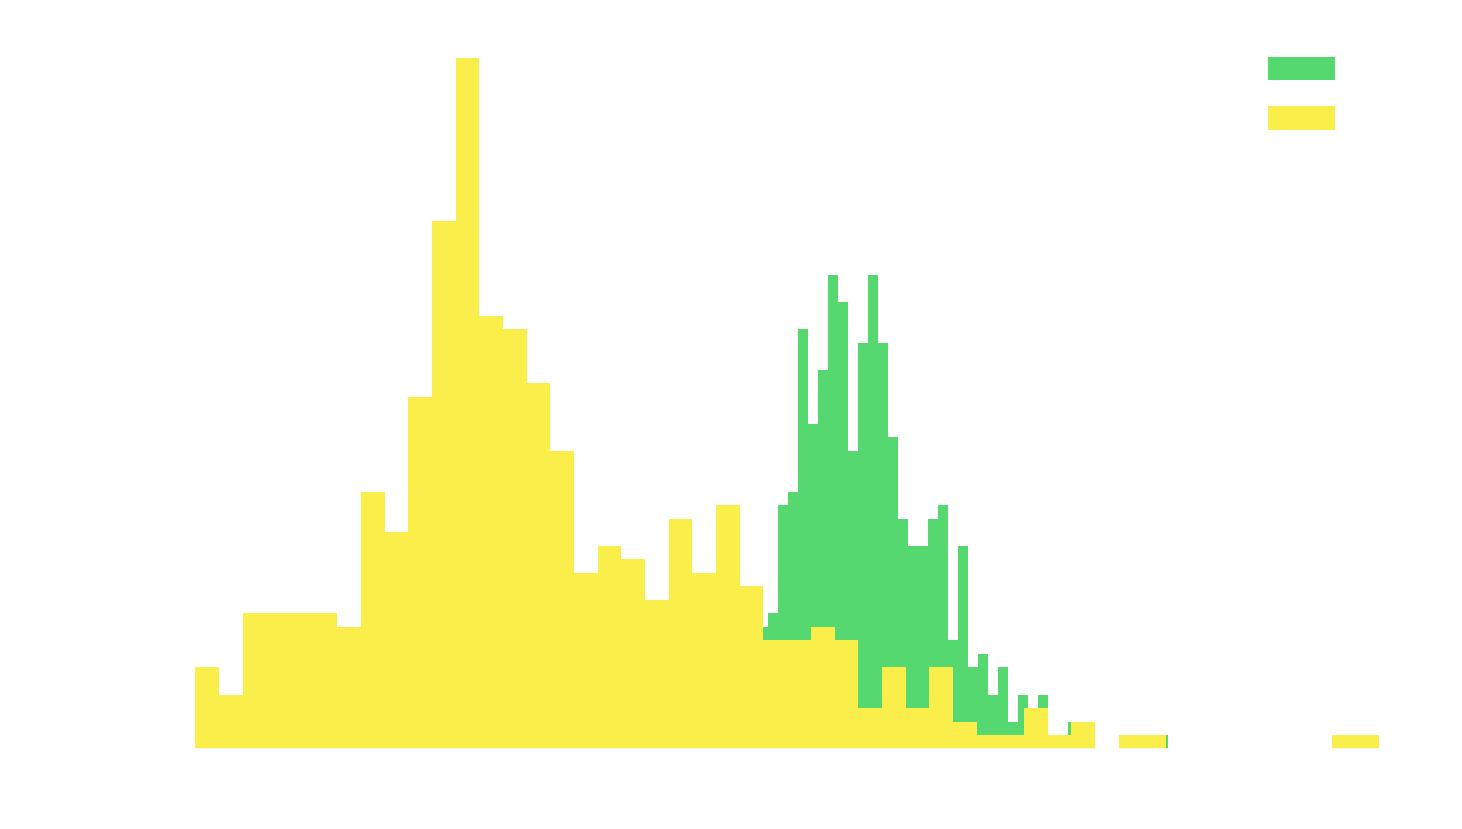

In [8]:
plt.hist(d1, label="D1")
plt.hist(d2, label="D2")
plt.legend();
plt.ylabel('Counts');

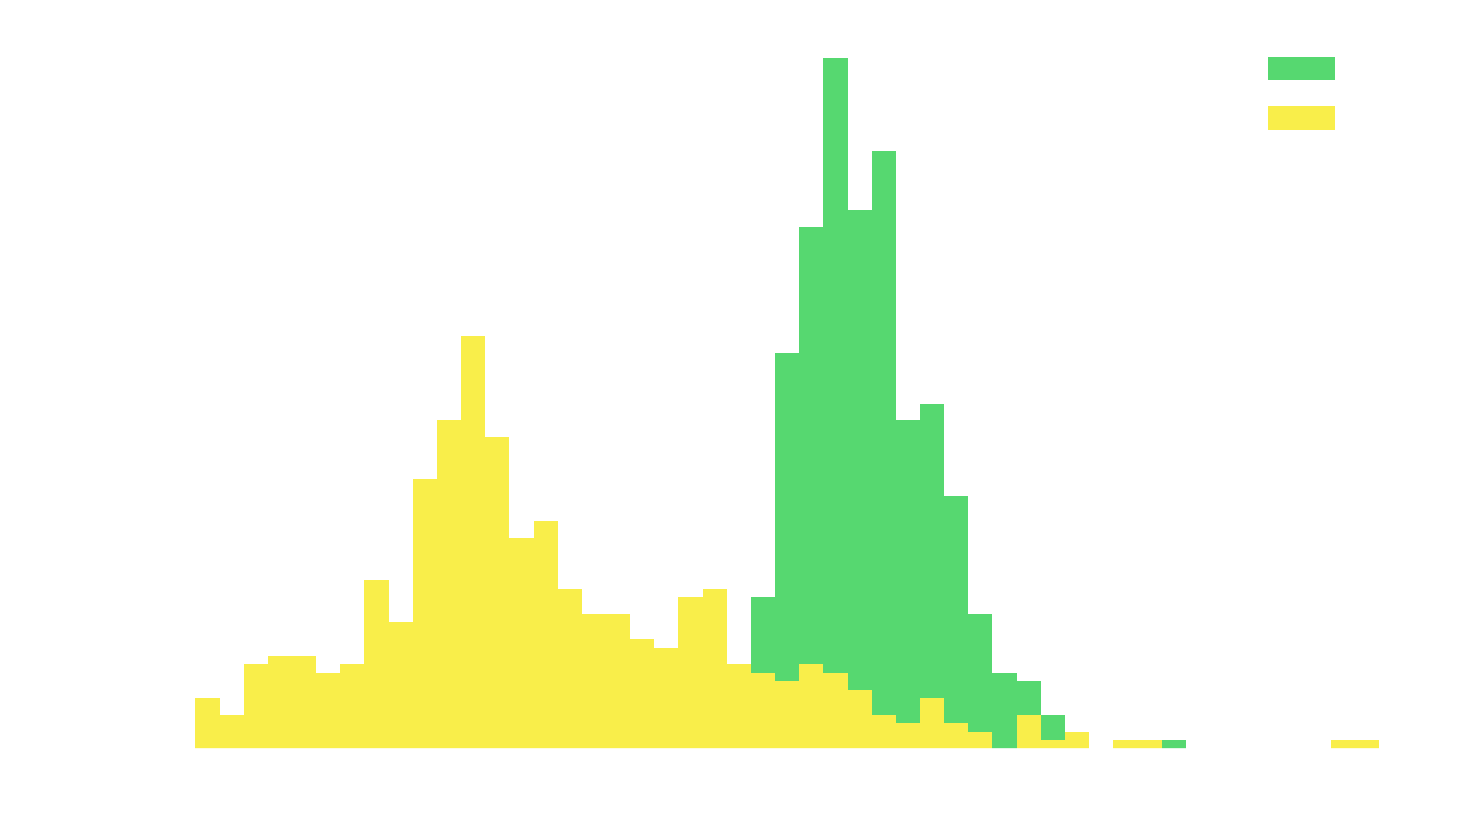

In [19]:
# The idea is to show both data in the same scale; or at least improve the reading of the same scale;
# putting both data in the same bin scale, is basically normalizing the data;
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1, _, _ = plt.hist(d1, bins=bins, label="D1")
plt.hist(d2, bins=bins, label="D2")
plt.legend();
plt.ylabel('Counts');

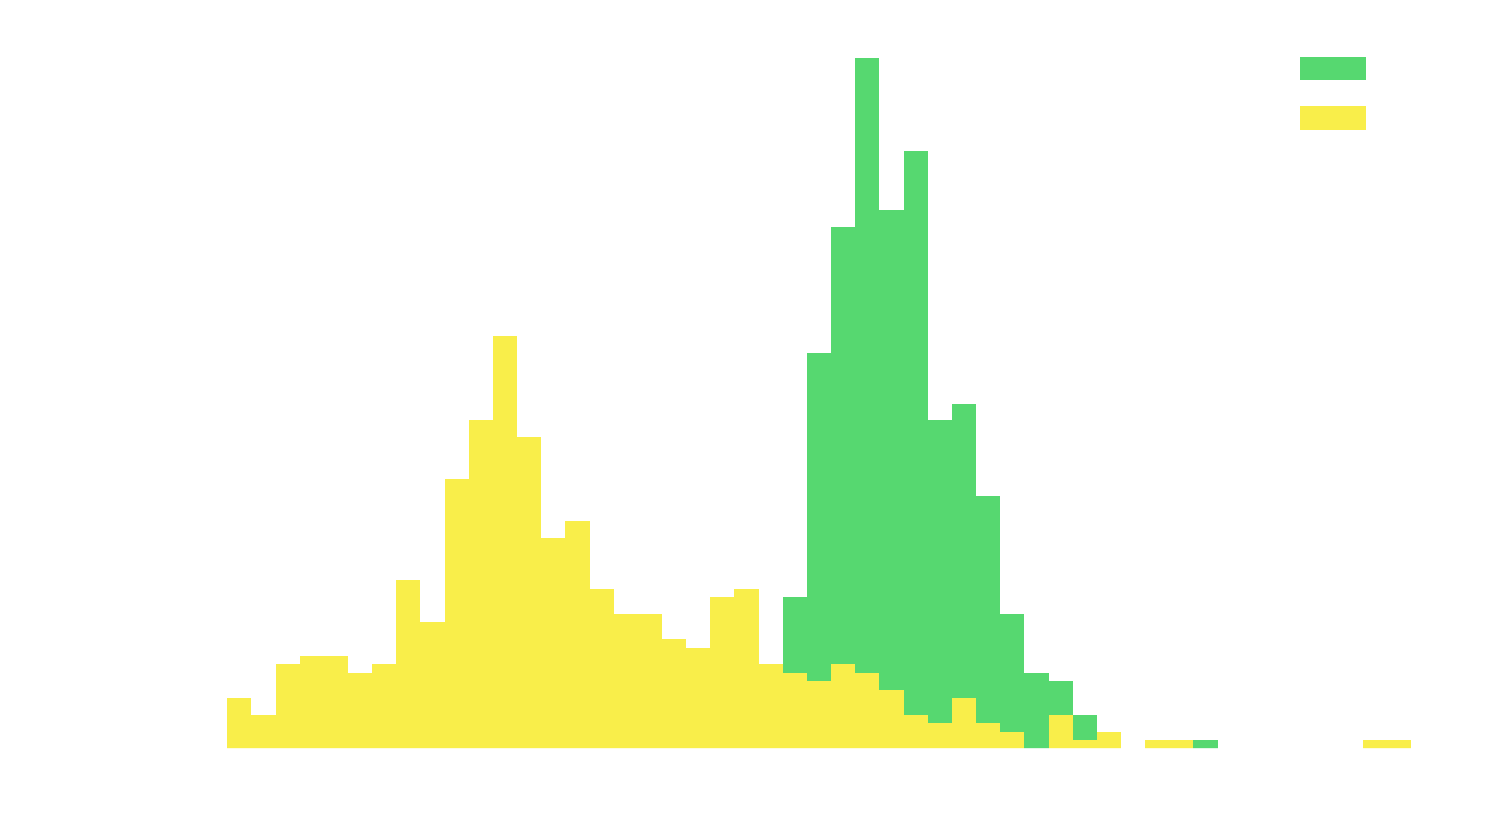

In [20]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1, _, _ = plt.hist(d1, bins=bins, label="D1", density=True)
plt.hist(d2, bins=bins, label="D2", density=True)
plt.legend();
plt.ylabel('Probability');

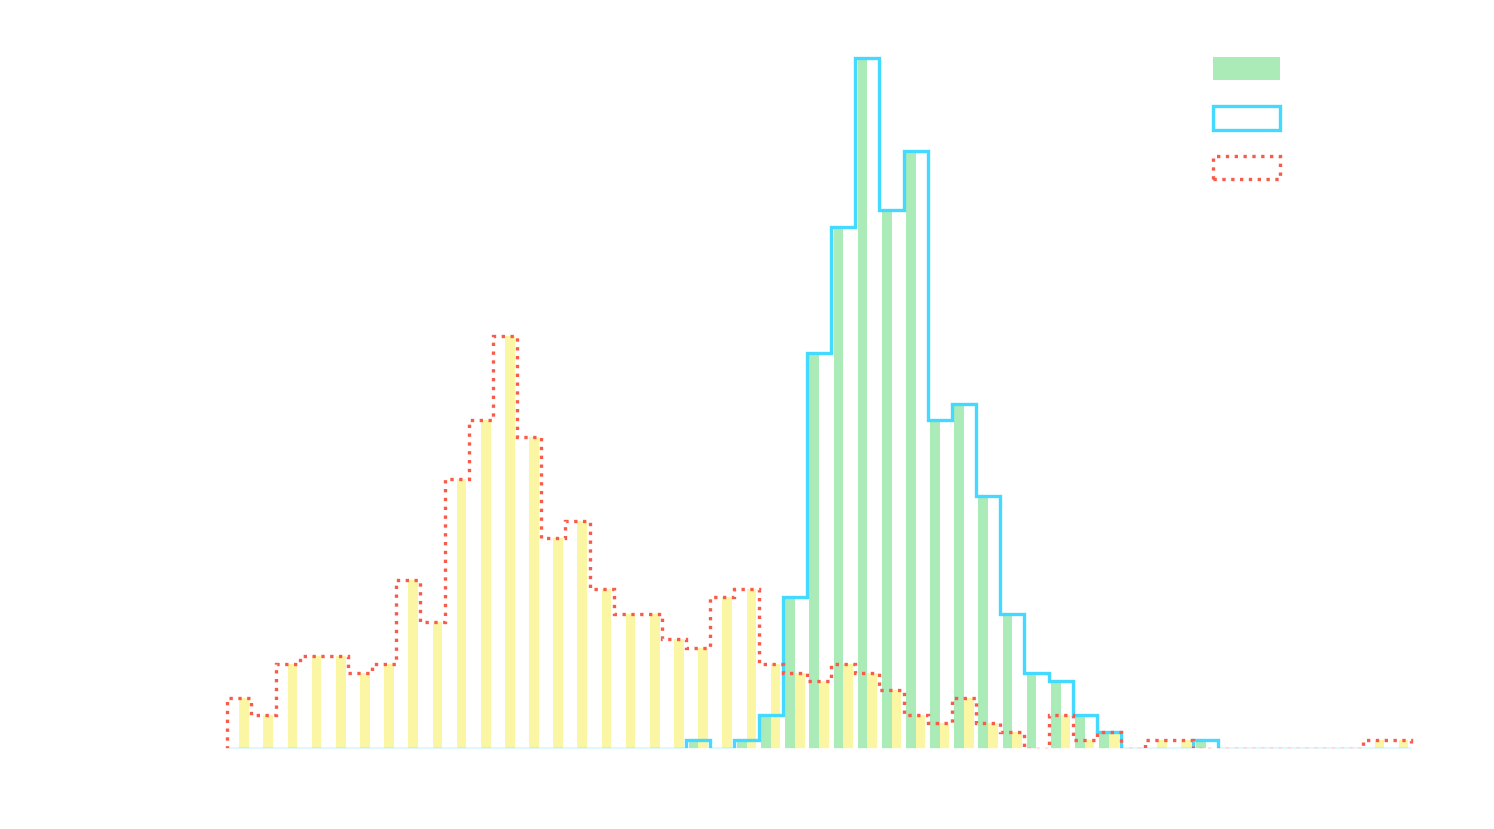

In [23]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plt.hist([d1, d2], bins=bins, label="Stacked", density=True, alpha=0.5)
plt.hist(d1, bins=bins, label="D1", density=True, histtype='step', lw=1)
plt.hist(d2, bins=bins, label="D2", density=True, histtype='step', ls=':')
plt.legend();
plt.ylabel('Probability');

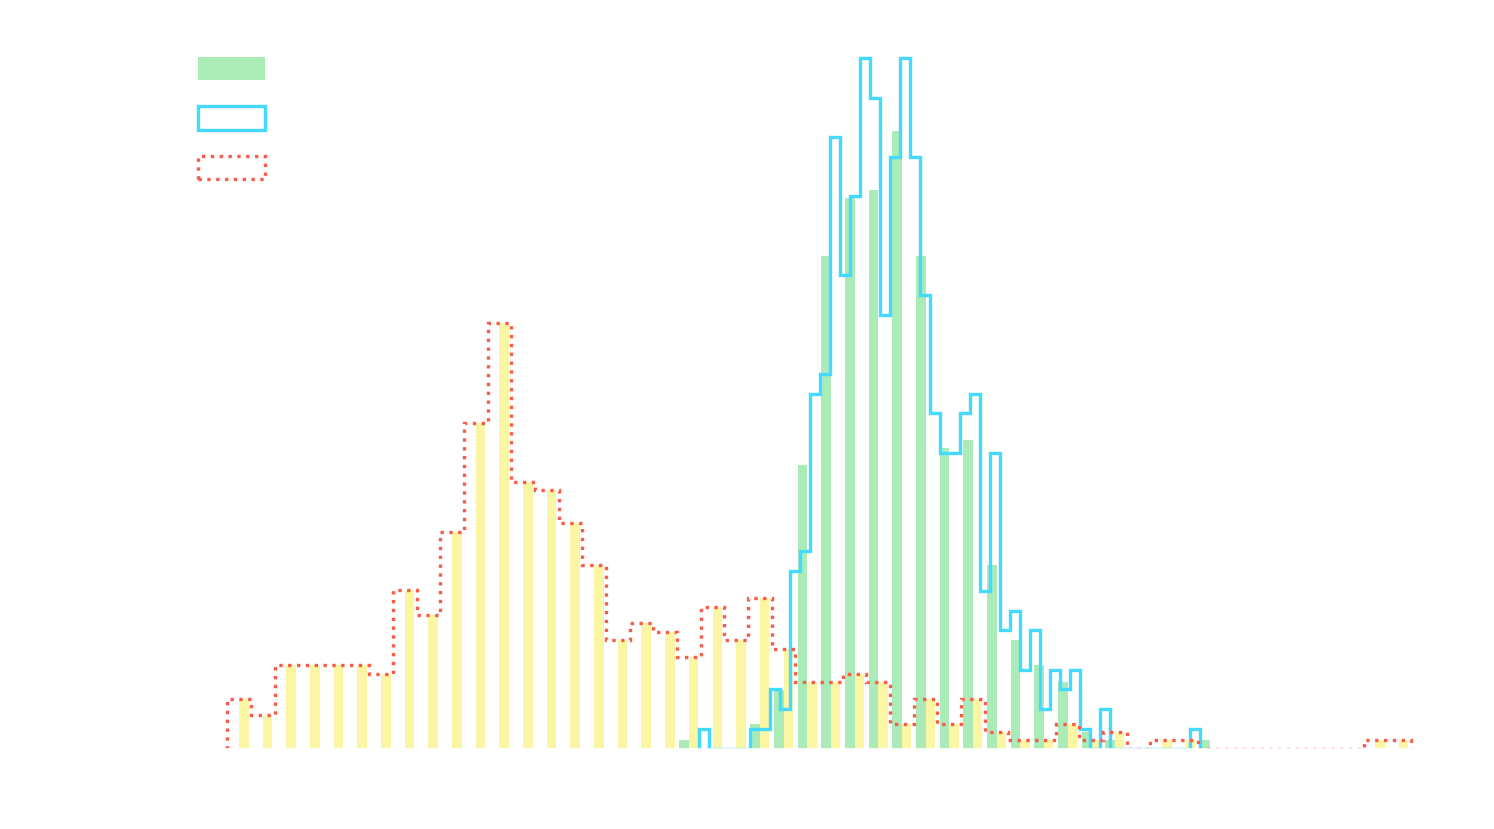

In [30]:
# When we have difficult defining the bin we should look through the data and figure out what is best;
# density=True helps make the graph a better reading
# bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)

bins = 50
plt.hist([d1, d2], bins=bins, label="Stacked", density=True, alpha=0.5)
plt.hist(d1, bins=bins, label="D1", density=True, histtype='step', lw=1)
plt.hist(d2, bins=bins, label="D2", density=True, histtype='step', ls=':')
plt.legend();
plt.ylabel('Probability');

*******************
## Bee Swarm Plots

In [35]:
#Transform 2 np.array into 1 pd.DataFrame
dataset = pd.DataFrame({
    'value': np.concatenate((d1,d2)),
    'type': np.concatenate((np.ones(d1.shape), np.zeros(d2.shape)))
})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
 1   type    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


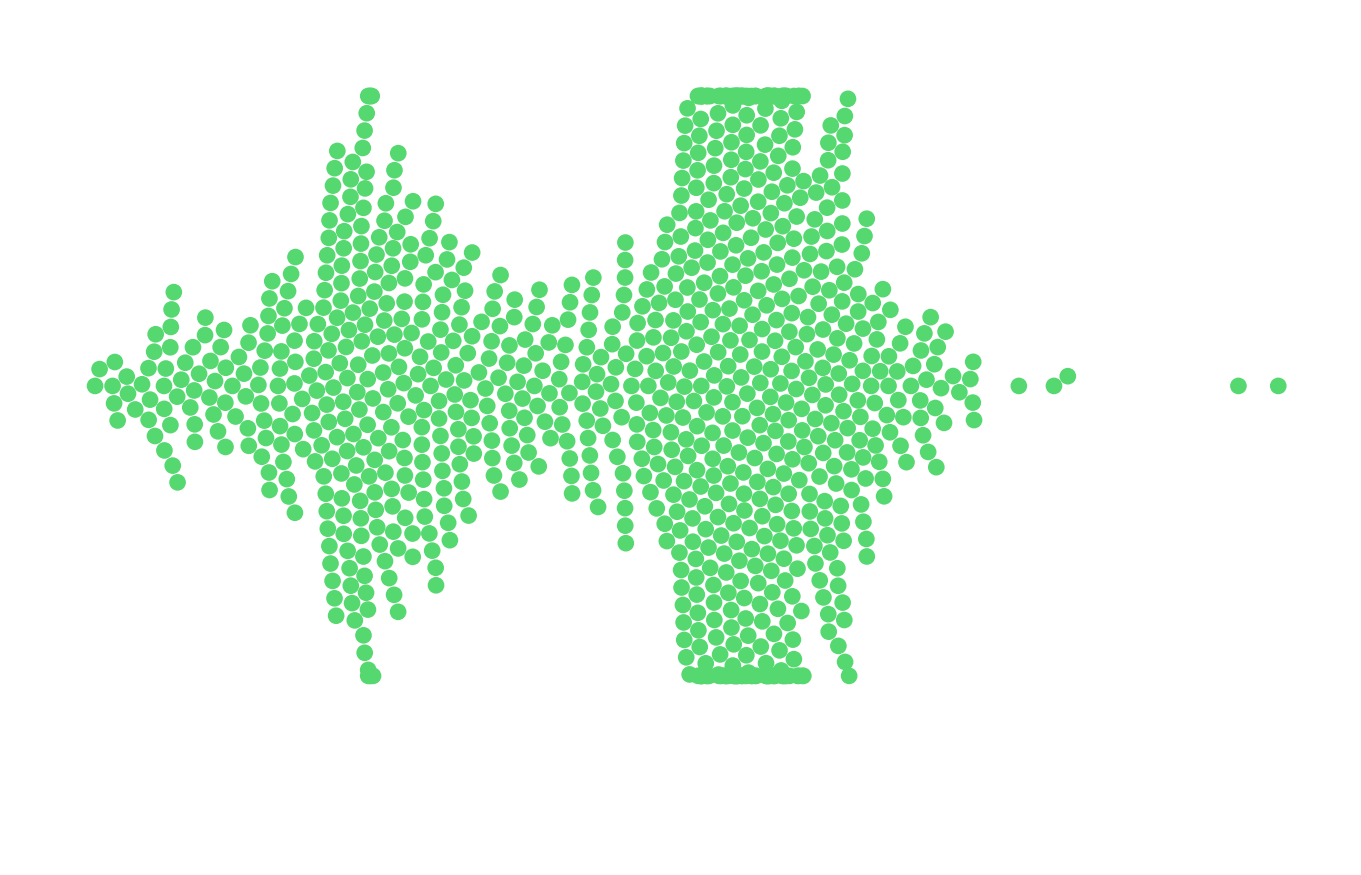

In [39]:
sb.swarmplot(dataset['value'])

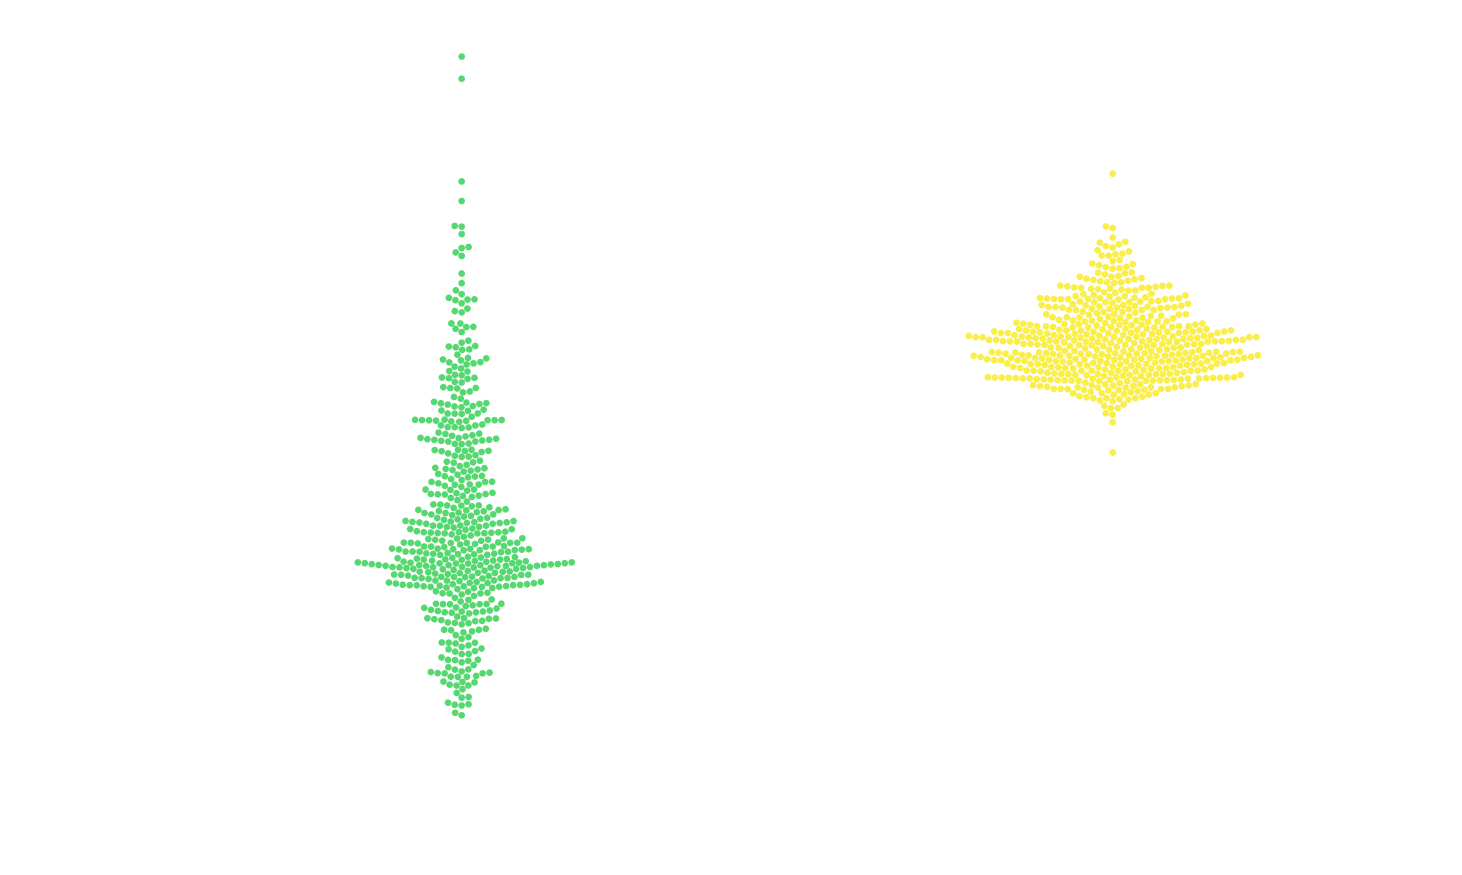

In [41]:
# With data categorical the swarm became better, like months of the year, weeks.
# A good use for Bee swarm would be sales in days of week;
sb.swarmplot(x='type', y='value', data=dataset, size=2);

***************
## Box Plots

In [42]:
dataset

,value,type
0,13.995,1.0
1,13.125,1.0
2,13.508,1.0
3,14.220,1.0
4,13.478,1.0
...,...,...
995,7.805,0.0
996,5.750,0.0
997,0.568,0.0
998,7.237,0.0


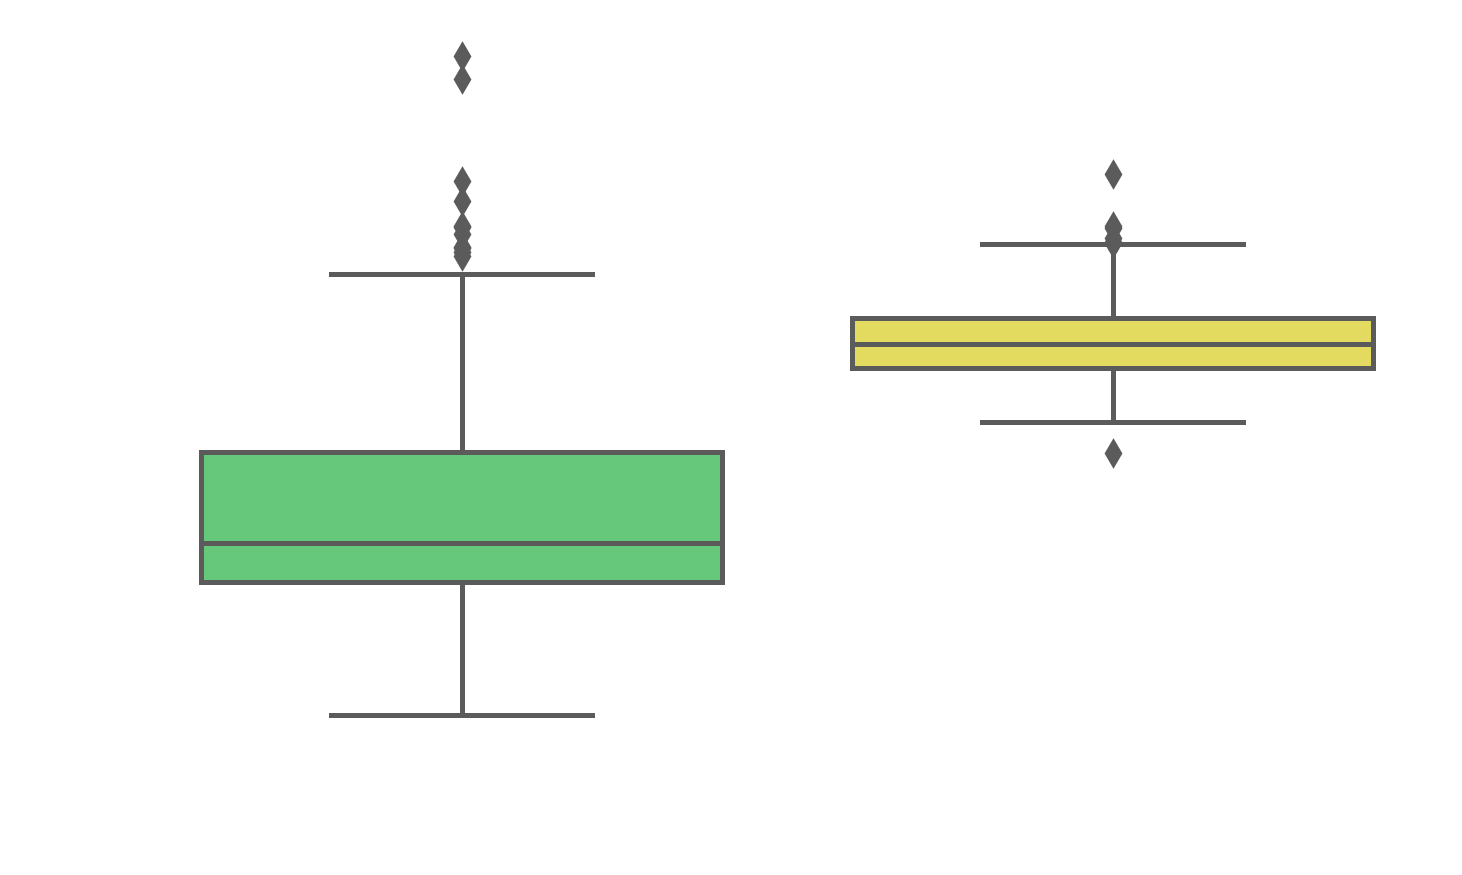

In [44]:
# The boxplt have bottom: 25%, 50% and top: 75%; Above all is outliers, under all is outliers;
sb.boxplot(x="type", y='value', data=dataset);

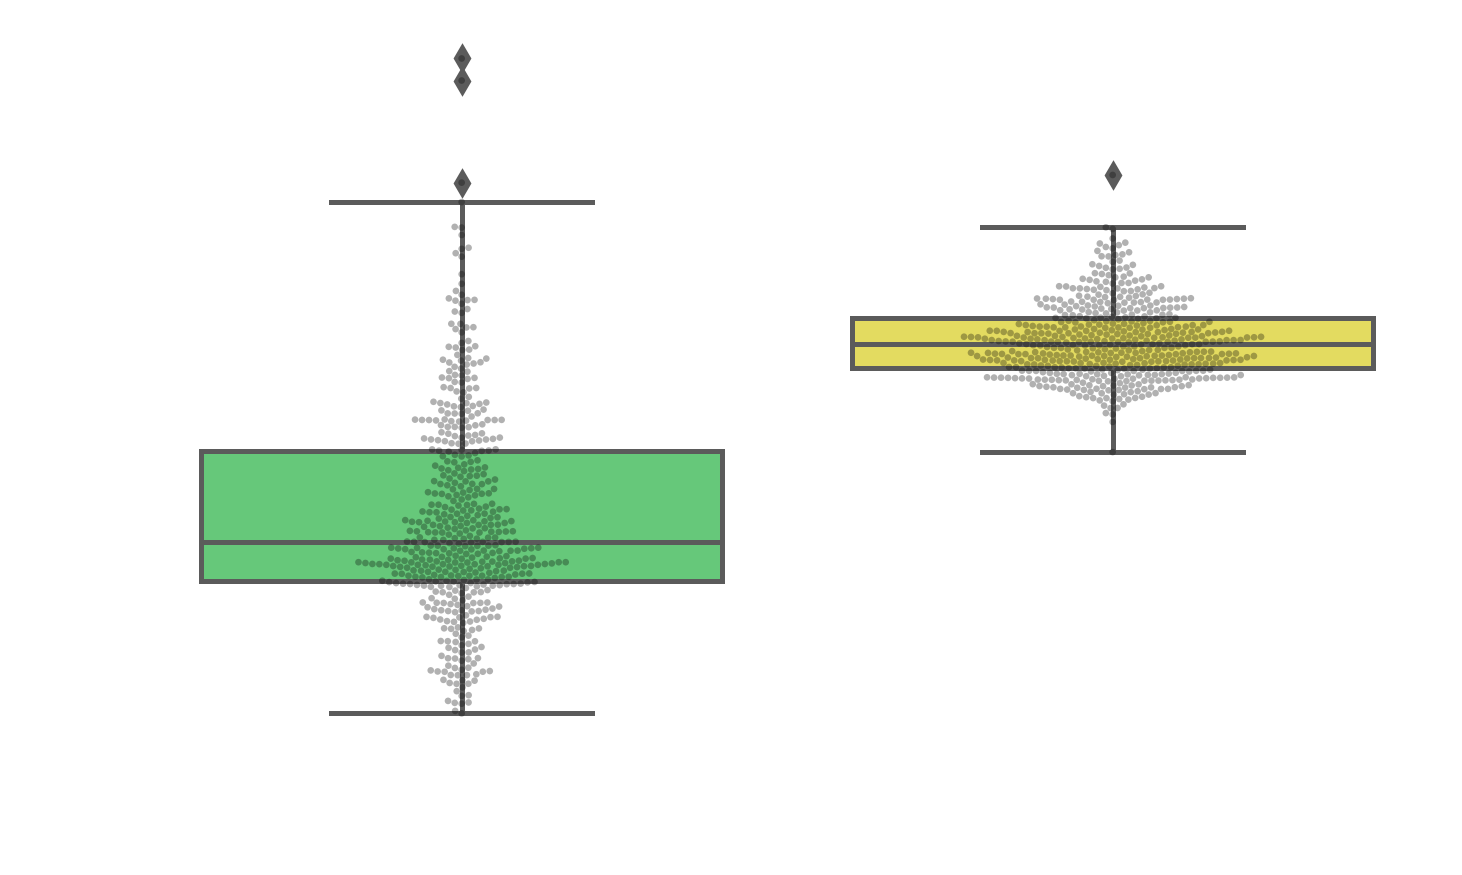

In [48]:
# Good for comparing many different distribution, just because we lose a lot of data;
sb.boxplot(x="type", y='value', data=dataset, whis=2.0);
sb.swarmplot(x="type", y='value', data=dataset, size=2, color="k", alpha=0.3);


## Violin Plots


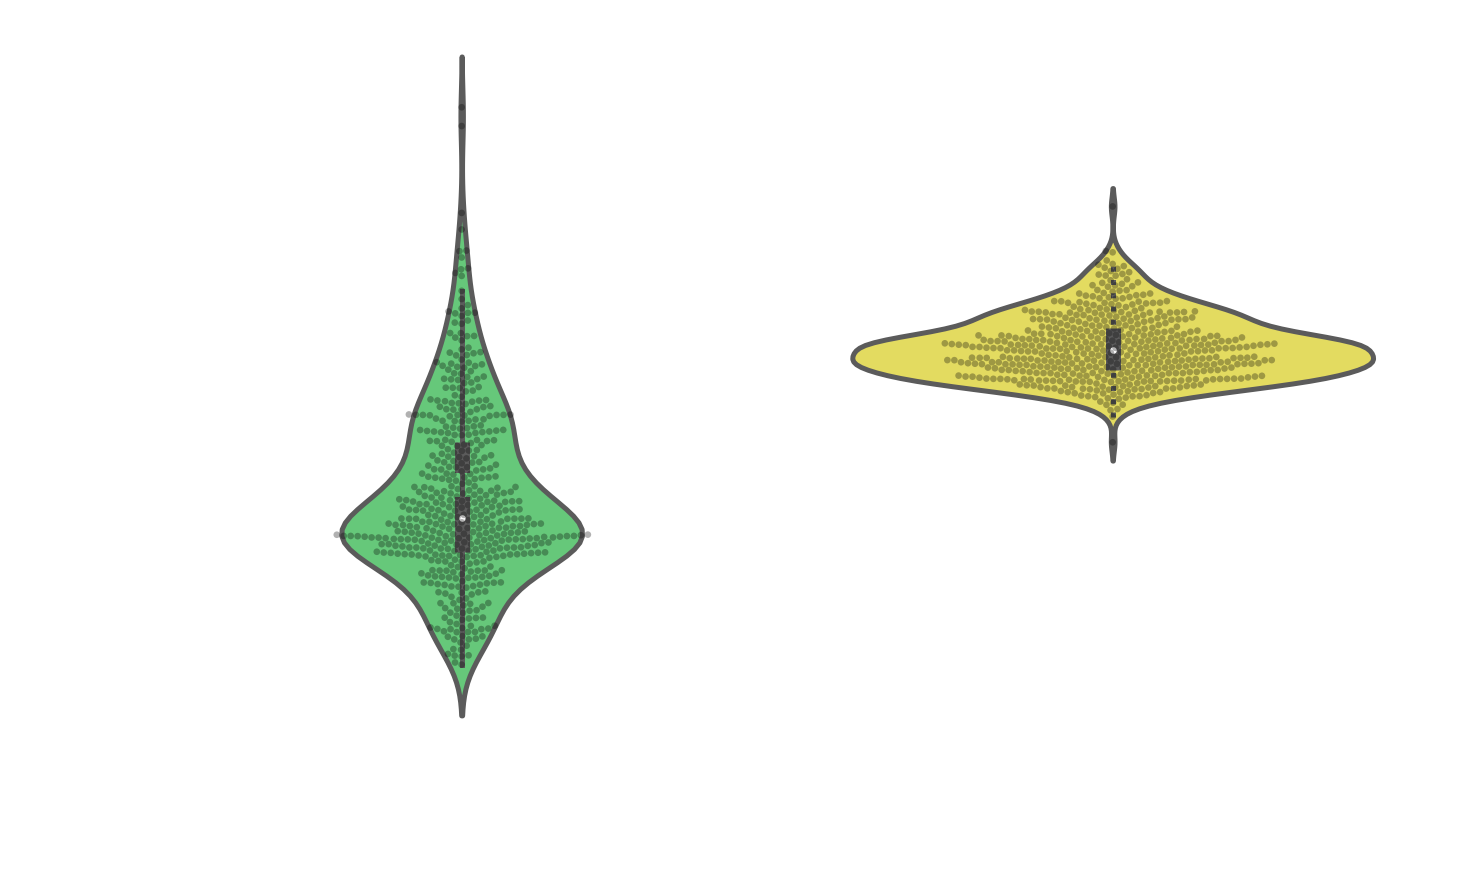

In [49]:
sb.violinplot(x="type", y='value', data=dataset);
sb.swarmplot(x="type", y='value', data=dataset, size=2, color="k", alpha=0.3);

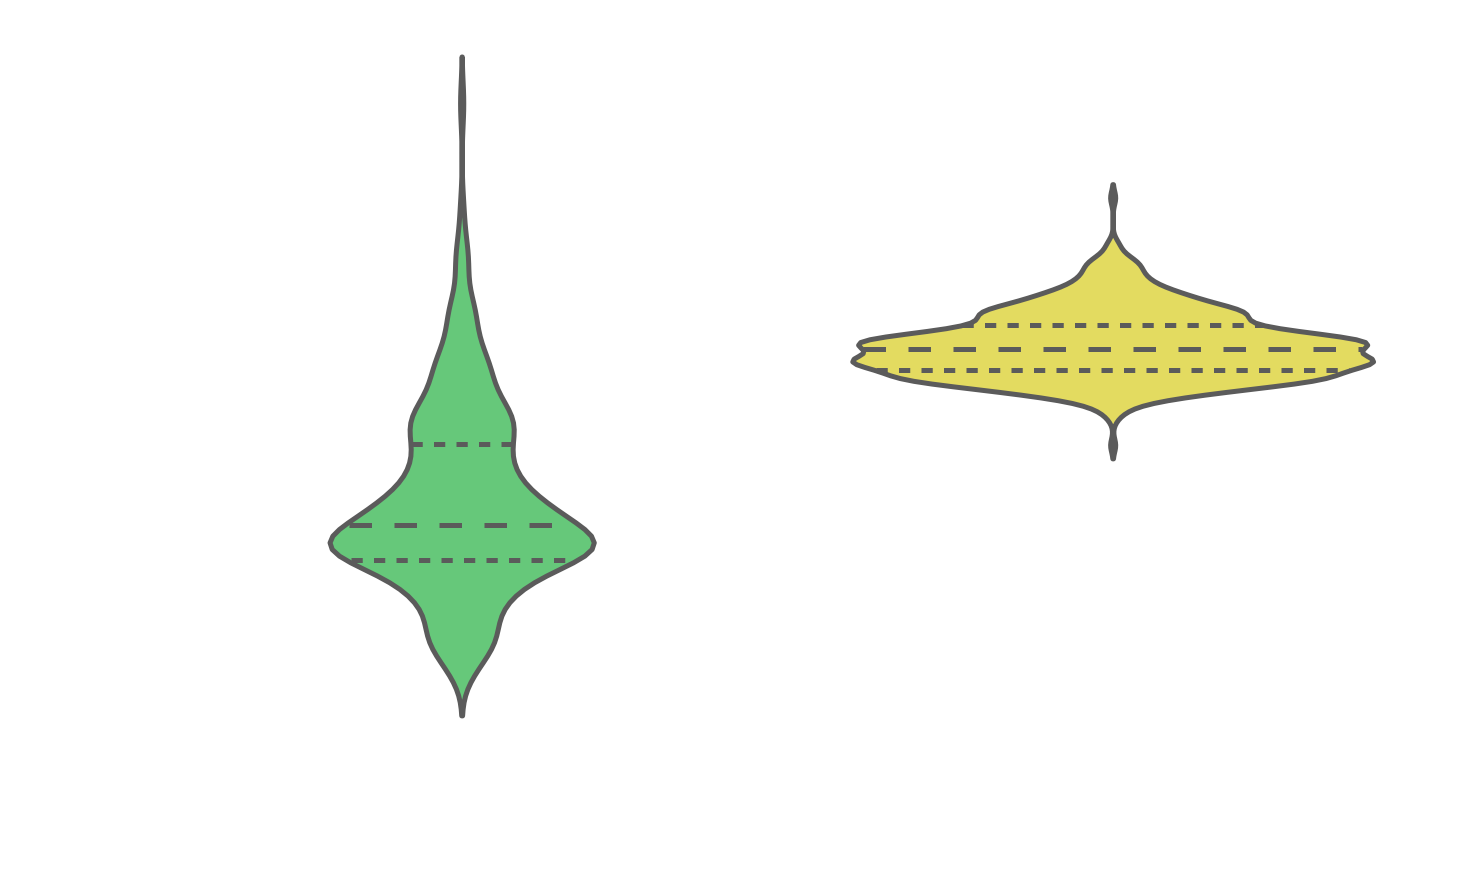

In [55]:
# Smoothness of the violin plots -> bandwidth = bw = 0.1 or 0.2
sb.violinplot(x="type", y='value', data=dataset, inner='quartile', bw=0.2);


*******
### Empirical Cumulative Distribution Functions

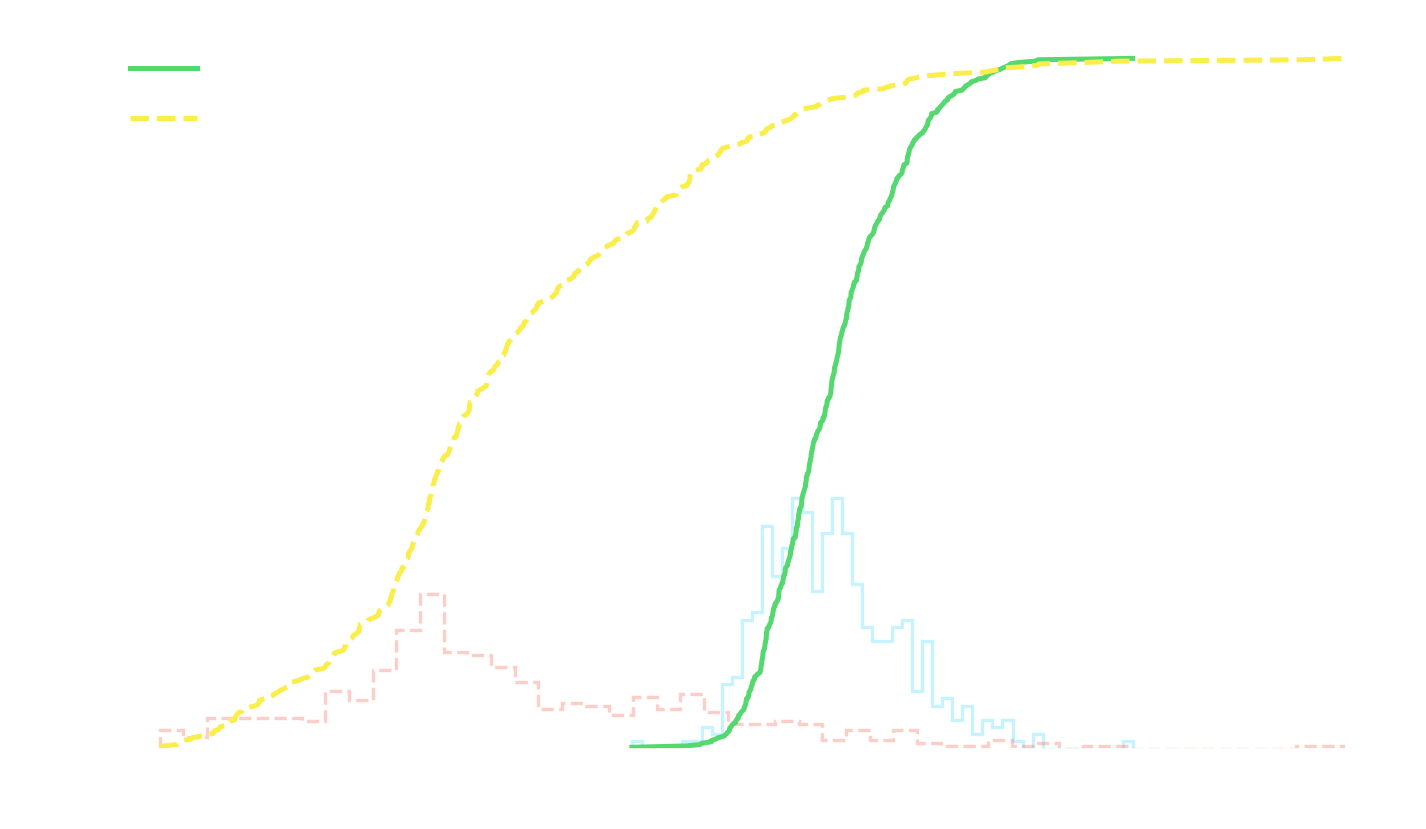

In [57]:
sd1 = np.sort(d1)
sd2 = np.sort(d2)
cdf = np.linspace(1/d1.size,1, d1.size)

plt.plot(sd1, cdf, label='D1 CDF')
plt.plot(sd2, cdf, label='D2 CDF')
plt.hist(d1, histtype='step', density=True, alpha=0.3)
plt.hist(d2, histtype='step', density=True, alpha=0.3)
plt.legend();

# The tigther the distribution the more stip the curve is;

********
# Describe

In [65]:
# We can create a dictionary with the d1 and d2 numpy arrays
df = pd.DataFrame({"Data1": d1, 'Data2': d2})
df.describe()

,Data1,Data2
count,500.000000,500.000000
mean,13.511172,7.390714
std,1.296363,3.589993
min,9.640000,0.568000
25%,12.572000,5.164750
50%,13.389500,6.531000
75%,14.291250,9.664500
max,19.262000,23.307000
